In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\ATOnile\Downloads\All the Intermediate Colleges in Pakistan.csv")

In [5]:
df

,Name,Location,Study Program,Sector,Affiliation,Rating
0,Campus.pk Lahore,"Office 206, 2nd Floor Siddique Trade Center Ma...",FSc Pre Engineering Fsc Pre Medical,Private,ads,0*
1,Allama Iqbal Open University Aiou Islamabad,"Sector H-8, Islamabad-44000",FSc Pre Engineering ICs Computer Science FSc P...,Public,NaN,5*
2,Government College University Gcu Lahore,"GC University, Katchery Road Lahore 54000",FSc Pre Engineering ICS Computer Science FSc P...,Public,HEC,4*
3,Govt College University GCU Faisalabad,"Kotwali Rd, Faisalabad 38000",FSc Pre-Engineering ICS FSc Pre-Medical Icom F...,Public,HEC,3*
4,Lahore College For Women University (Lcwu) Lahore,"Near Wapda Flats, Jail Road, Lahore",FA Arts FSc Pre Engineering ICS Physics ICS St...,Public,NaN,5*
...,...,...,...,...,...,...
1625,Riphah International College Lodhran,Riphah International College Lodhran,Fsc Pre Engineering FSc Pre Medical ICS ICOM FA,Private,NaN,0*
1626,Govt College of Education Bagh,Bagh Azad Kashmir,FA ICS Computer Science FSc Pre Engineering IC...,Public,NaN,0*
1627,Riphah International College Swat,Riphah International College Swat,Fsc Pre Engineering FSc Pre Medical ICS ICOM FA,Private,NaN,0*
1628,Riphah International College Dina,Riphah International College Dina,Fsc Pre Engineering FSc Pre Medical ICS ICOM FA,Private,NaN,0*


In [93]:
df.head(3)

,Name,Location,Study Program,Sector,Affiliation,Rating,City
0,Campus.pk Lahore,"Office 206, 2nd Floor Siddique Trade Center Ma...",FSc Pre Engineering Fsc Pre Medical,Private,ads,0*,2nd Floor Siddique Trade Center Main Boulevard...
1,Allama Iqbal Open University Aiou Islamabad,"Sector H-8, Islamabad-44000",FSc Pre Engineering ICs Computer Science FSc P...,Public,University of Sargodha,5*,Islamabad-44000
2,Government College University Gcu Lahore,"GC University, Katchery Road Lahore 54000",FSc Pre Engineering ICS Computer Science FSc P...,Public,HEC,4*,Katchery Road Lahore 54000


In [95]:
df.tail(3)

,Name,Location,Study Program,Sector,Affiliation,Rating,City
1627,Riphah International College Swat,Riphah International College Swat,Fsc Pre Engineering FSc Pre Medical ICS ICOM FA,Private,University of Sargodha,0*,Riphah International College Swat
1628,Riphah International College Dina,Riphah International College Dina,Fsc Pre Engineering FSc Pre Medical ICS ICOM FA,Private,University of Sargodha,0*,Riphah International College Dina
1629,Riphah International College Dargai,Riphah International College Dargai,Fsc Pre Engineering FSc Pre Medical ICS ICOM FA,Private,University of Sargodha,0*,Riphah International College Dargai


In [7]:
df.isnull().sum()

Name                0
Location            4
Study Program       0
Sector            529
Affiliation      1475
Rating              0
dtype: int64

In [9]:
modes = df['Sector'].mode()[0]
df['Sector'].fillna(modes, inplace = True)

In [11]:
df.dtypes

Name             object
Location         object
Study Program    object
Sector           object
Affiliation      object
Rating           object
dtype: object

In [89]:

df['Affiliation'].ffill( inplace = True)

In [91]:
df.isnull().sum()

Name             0
Location         4
Study Program    0
Sector           0
Affiliation      0
Rating           0
City             0
dtype: int64

In [15]:
location = df['Location'].mode()[0]
location

'Chakwal'

In [20]:
df['Location'].fillna(location, inplace = True)

# Total Number of Colleges:

In [179]:
total_unique_colleges = df['Name'].nunique()
total_unique_colleges

1630

In [17]:
 sector =df['Sector'].value_counts().reset_index()
 sector

,Sector,count
0,Private,1091
1,Public,539


# Colleges by Sector

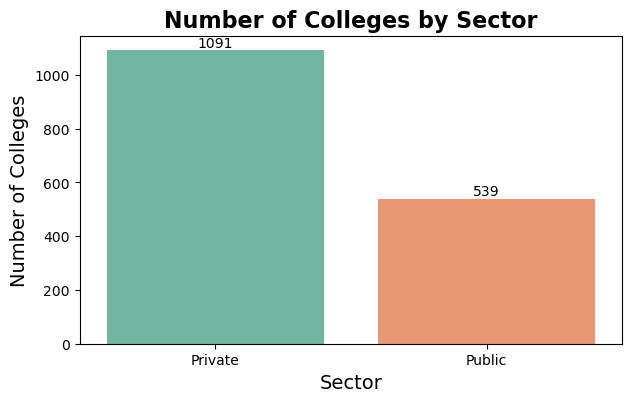

In [232]:
# college by sector
plt.figure(figsize=(7,4))
sns.barplot(x = 'Sector', y = 'count', data = sector, palette='Set2')
plt.title('Number of Colleges by Sector', fontsize=16, fontweight='bold')
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Number of Colleges', fontsize=14)
for index, value in enumerate(sector['count']):
    plt.text(index, value, f'{value}', ha='center', va='bottom', fontsize=10)

plt.show()

# clg by sector

In [25]:
df['City'] = df['Location'].apply(lambda x: x.split(',')[-1].strip() if isinstance(x, str) else 'Unknown')
df['City']

0       2nd Floor Siddique Trade Center Main Boulevard...
1                                         Islamabad-44000
2                              Katchery Road Lahore 54000
3                                        Faisalabad 38000
4                                                  Lahore
                              ...                        
1625                 Riphah International College Lodhran
1626                                    Bagh Azad Kashmir
1627                    Riphah International College Swat
1628                    Riphah International College Dina
1629                  Riphah International College Dargai
Name: City, Length: 1630, dtype: object

In [62]:
clg_in_city = df['City'].value_counts().head(6).values
clg_in_city 


array([76, 74, 67, 49, 45, 28], dtype=int64)

In [60]:
clg_in_cities = df['City'].value_counts().head(6).index
clg_in_cities

Index(['Lahore', 'Islamabad', '', 'Karachi', 'Rawalpindi', 'Rawalpindi Cantt'], dtype='object', name='City')

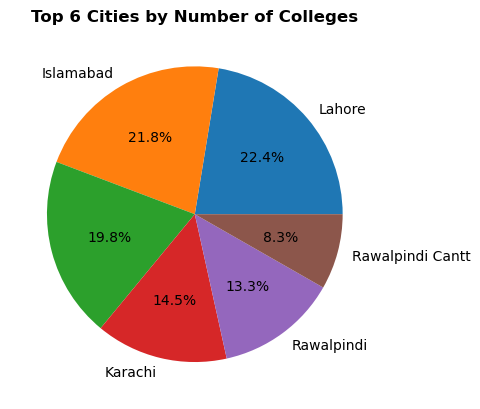

In [226]:
plt.pie(clg_in_city , labels = clg_in_cities, autopct = '%1.1f%%' )
plt.title('Top 6 Cities by Number of Colleges',fontweight = 'bold')
plt.show()

# Affiliated Colleges:

In [109]:
 affiliation = df['Affiliation'].value_counts().head(7).reset_index()
 affiliation

,Affiliation,count
0,University of Sargodha,1482
1,University of punjab,6
2,BISE Lahore \n University of the Punjab Lahore,6
3,University of Peshawar,5
4,University of the Punjab Lahore \n BISE Lahore,5
5,BISE Lahore,4
6,BISE Lahore \n Punjab University Lahore,4


In [234]:
df.head()

,Name,Location,Study Program,Sector,Affiliation,Rating,City
0,Campus.pk Lahore,"Office 206, 2nd Floor Siddique Trade Center Ma...",FSc Pre Engineering Fsc Pre Medical,Private,ads,0*,2nd Floor Siddique Trade Center Main Boulevard...
1,Allama Iqbal Open University Aiou Islamabad,"Sector H-8, Islamabad-44000",FSc Pre Engineering ICs Computer Science FSc P...,Public,University of Sargodha,5*,Islamabad-44000
2,Government College University Gcu Lahore,"GC University, Katchery Road Lahore 54000",FSc Pre Engineering ICS Computer Science FSc P...,Public,HEC,4*,Katchery Road Lahore 54000
3,Govt College University GCU Faisalabad,"Kotwali Rd, Faisalabad 38000",FSc Pre-Engineering ICS FSc Pre-Medical Icom F...,Public,HEC,3*,Faisalabad 38000
4,Lahore College For Women University (Lcwu) Lahore,"Near Wapda Flats, Jail Road, Lahore",FA Arts FSc Pre Engineering ICS Physics ICS St...,Public,University of Sargodha,5*,Lahore


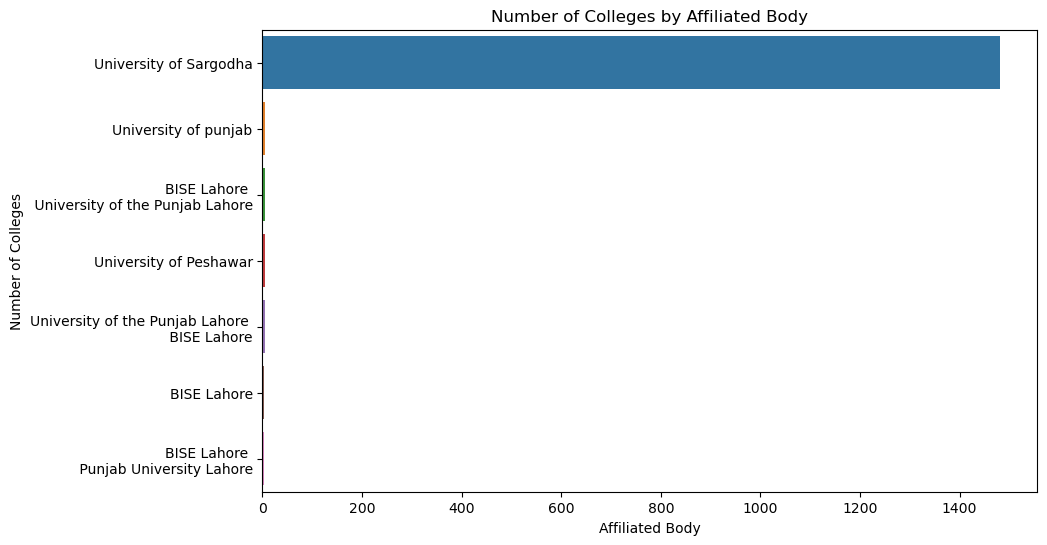

In [169]:
plt.figure(figsize=(10,6))
sns.barplot(y = 'Affiliation', x = 'count', data = affiliation)
plt.title('Number of Colleges by Affiliated Body')
plt.xlabel('Affiliated Body')
plt.ylabel('Number of Colleges')
plt.show()

#Colleges by Rating

In [134]:
rating = df['Rating'].value_counts().head(6)
rating

Rating
0*    1119
5*     158
4*     113
3*      77
2*      42
1*      41
Name: count, dtype: int64

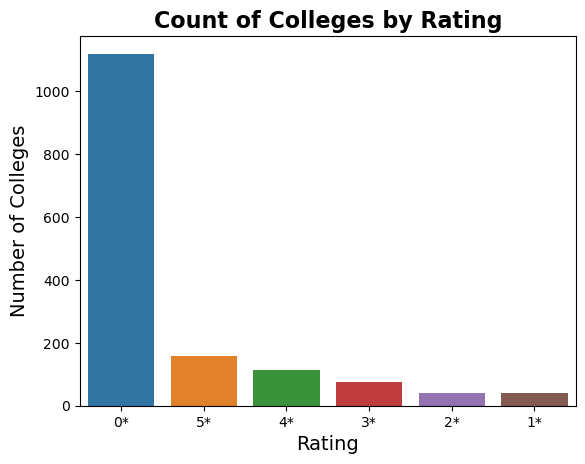

In [224]:
sns.countplot(x = 'Rating',data = df, order = rating.index)
plt.title('Count of Colleges by Rating', fontsize=16, fontweight='bold')
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Number of Colleges', fontsize=14)
plt.show()

# Study Program Offerings

In [159]:
study_program = df['Study Program'].value_counts().head(6).reset_index()
study_program

,Study Program,count
0,FA ICS Computer Science FSc Pre Medical FSc Pr...,49
1,FA FSc Pre-Engineering FSc Pre-Medical FA Gene...,44
2,FA FSc Pre-Engineering FSc Pre-Medical ICS ICo...,34
3,Fsc Pre Engineering FSc Pre Medical ICS ICOM FA,32
4,FA ICS Computer Science FSc Pre Medical FSc Pr...,30
5,FA FSc Pre Engineering FSc Pre Medical ICS Com...,29


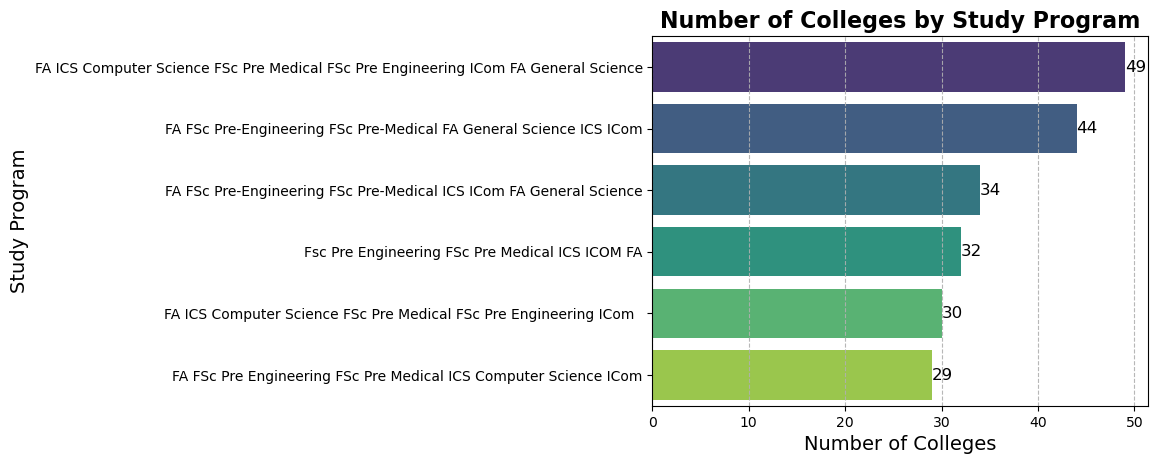

In [222]:
sns.barplot(x = 'count', y = 'Study Program', data = study_program, palette='viridis')
plt.title('Number of Colleges by Study Program', fontsize=16, fontweight='bold')
plt.xlabel('Number of Colleges', fontsize=14)
plt.ylabel('Study Program', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.9)
# Show the value on the bars
for index, value in enumerate(study_program['count']):
    plt.text(value, index, f'{value}', va='center', fontsize=12)

plt.show()